In [ ]:
install.packages(c("forecast", "xts","tseries","ggplot2"))
library(forecast)
library(xts)
library(tseries)
library(ggplot2)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘TTR’, ‘colorspace’, ‘fracdiff’, ‘lmtest’, ‘timeDate’, ‘urca’, ‘zoo’, ‘quadprog’, ‘quantmod’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [ ]:
df = read.csv("/content/NFLX.csv")
head(df)

,Date,Open,High,Low,Close,Adj.Close,Volume
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
2,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
3,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
4,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
5,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200
6,2002-05-31,1.078571,1.078571,1.071429,1.076429,1.076429,8464400


In [ ]:
dim(df)
print(colSums(is.na(df)))

[1] 5044    7

     Date      Open      High       Low     Close Adj.Close    Volume 
        0         0         0         0         0         0         0 


In [ ]:
summary(df)

     Date                Open               High               Low          
 Length:5044        Min.   :  0.3779   Min.   :  0.4107   Min.   :  0.3464  
 Class :character   1st Qu.:  3.9554   1st Qu.:  4.0311   1st Qu.:  3.8854  
 Mode  :character   Median : 25.8193   Median : 26.3421   Median : 25.4550  
                    Mean   :116.4680   Mean   :118.2374   Mean   :114.5787  
                    3rd Qu.:155.7625   3rd Qu.:157.6550   3rd Qu.:153.9450  
                    Max.   :692.3500   Max.   :700.9900   Max.   :686.0900  
     Close            Adj.Close            Volume         
 Min.   :  0.3729   Min.   :  0.3729   Min.   :   285600  
 1st Qu.:  3.9586   1st Qu.:  3.9586   1st Qu.:  6168225  
 Median : 25.8029   Median : 25.8029   Median : 10591350  
 Mean   :116.4563   Mean   :116.4563   Mean   : 16530682  
 3rd Qu.:155.8700   3rd Qu.:155.8700   3rd Qu.: 19865525  
 Max.   :691.6900   Max.   :691.6900   Max.   :323414000  

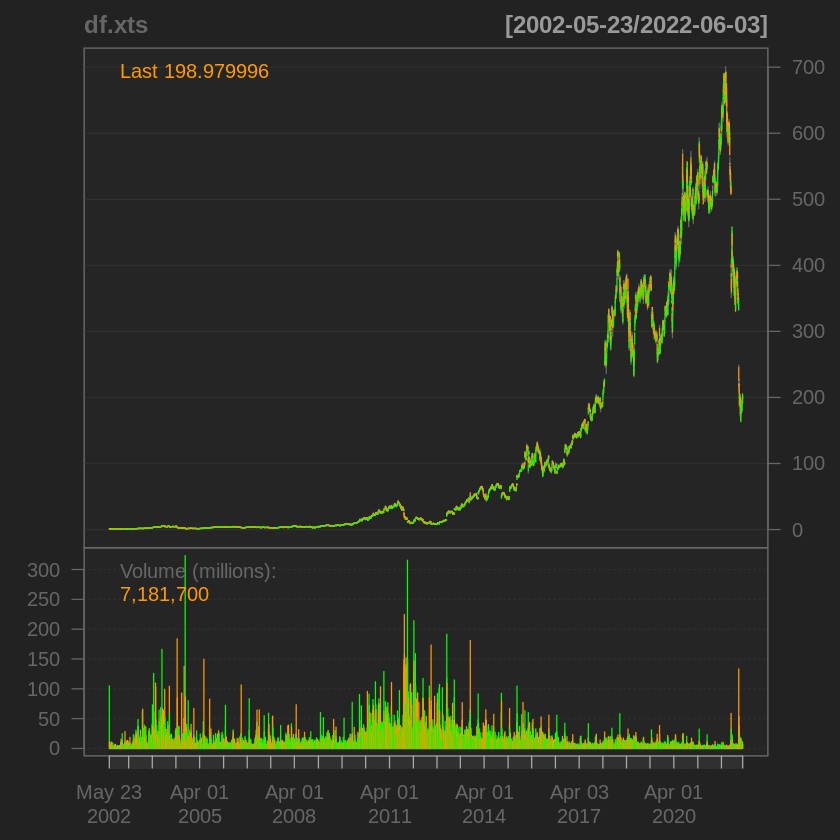

In [ ]:
df.xts <- xts(df[, -1], order.by = as.Date(df[, 1]))
chartSeries(df.xts, type = 'auto')

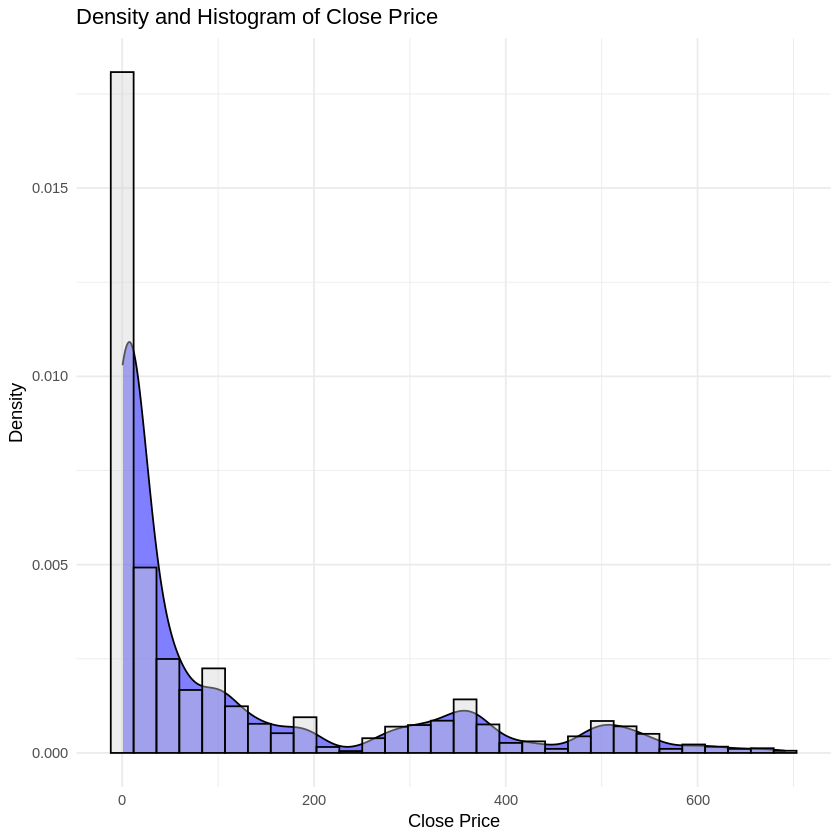

In [ ]:
ggplot(df, aes(x = Close)) +
  geom_density(alpha = 0.5, fill = "blue") +
  geom_histogram(aes(y = ..density..), color = "black", fill = "lightgray", bins = 30, alpha = 0.4) +
  labs(title = "Density and Histogram of Close Price", x = "Close Price", y = "Density") +
  theme_minimal()

In [ ]:
df.close = df[,4]
df.close.train = df.close[1:(0.8 * length(df.close))]
df.close.test = df.close[(0.8 * length(df.close)):length(df.close)]


In [ ]:
df.close.arima = auto.arima(df.close.train, seasonal = TRUE, stepwise = TRUE, nmodels = 100, trace = TRUE, biasadj = TRUE)
summary(df.close.arima)


 Fitting models using approximations to speed things up...

 ARIMA(2,2,2)                    : Inf
 ARIMA(0,2,0)                    : 18550.28
 ARIMA(1,2,0)                    : 17647.54
 ARIMA(0,2,1)                    : Inf
 ARIMA(2,2,0)                    : 17180.86
 ARIMA(3,2,0)                    : 16887.22
 ARIMA(4,2,0)                    : 16859.23
 ARIMA(5,2,0)                    : 16713.11
 ARIMA(5,2,1)                    : Inf
 ARIMA(4,2,1)                    : Inf

 Now re-fitting the best model(s) without approximations...

 ARIMA(5,2,0)                    : 16712.53

 Best model: ARIMA(5,2,0)                    



Series: df.close.train 
ARIMA(5,2,0) 

Coefficients:
          ar1      ar2      ar3      ar4      ar5
      -0.7254  -0.5958  -0.4283  -0.2237  -0.1914
s.e.   0.0155   0.0189   0.0200   0.0190   0.0155

sigma^2 = 3.684:  log likelihood = -8350.25
AIC=16712.51   AICc=16712.53   BIC=16750.32

Training set error measures:
                     ME     RMSE      MAE        MPE     MAPE     MASE
Training set 0.00200052 1.917811 0.749739 0.01071613 2.516514 1.103833
                    ACF1
Training set -0.03349853

In [ ]:
df.close.forecast = forecast(df.close.arima, h = length(df.close.test))

accuracy(df.close.forecast, df.close.test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,2.000520e-03,1.917811,0.749739,0.01071613,2.516514,1.103833,-0.03349853
Test set,-1.239104e+03,1421.241949,1239.224800,-314.20639966,314.236230,1824.498740,NA


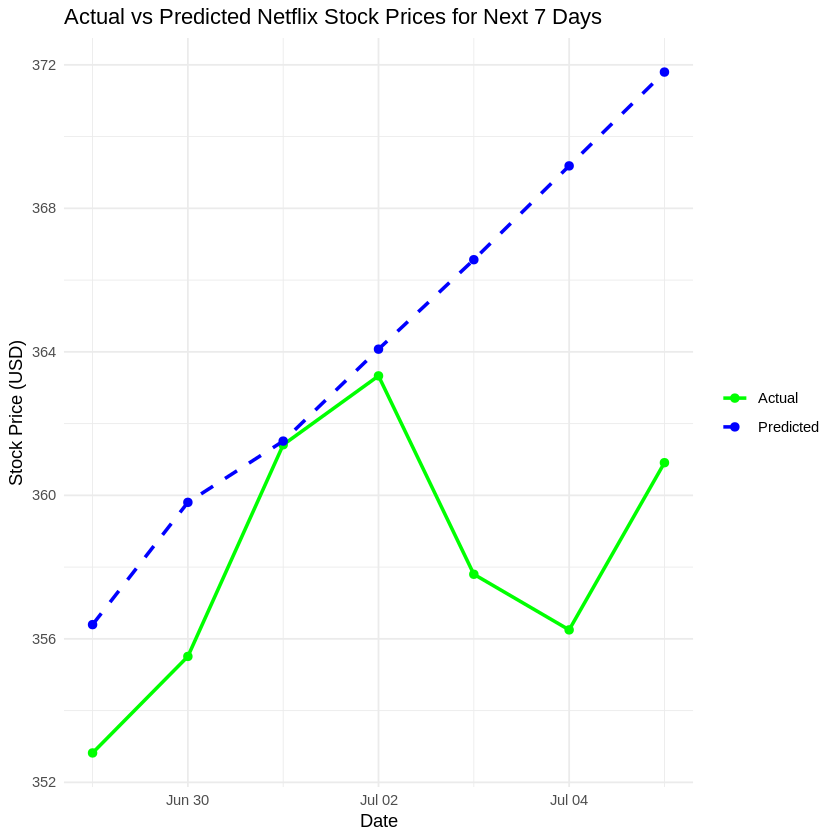

In [ ]:
pred1 = predict(df.close.arima, n.ahead = 7)

forecasted_values = pred1$pred

forecast_dates = seq(from = as.Date("2018-06-29"), by = "days", length.out = 7)

forecast_df = data.frame(Date = forecast_dates, Predicted = forecasted_values)

actual_values = head(df.close.test, 7)

comparison_df = data.frame(
  Date = forecast_dates,
  Actual = actual_values,
  Predicted = forecasted_values
)
ggplot(comparison_df, aes(x = Date)) +
  geom_line(aes(y = Actual, color = "Actual"), size = 1) +
  geom_point(aes(y = Actual, color = "Actual"), size = 2) +
  geom_line(aes(y = Predicted, color = "Predicted"), size = 1, linetype = "dashed") +
  geom_point(aes(y = Predicted, color = "Predicted"), size = 2) +
  labs(title = "Actual vs Predicted Netflix Stock Prices for Next 7 Days",
       x = "Date",
       y = "Stock Price (USD)") +
  scale_color_manual(values = c("Actual" = "green", "Predicted" = "blue")) +
  theme_minimal() +
  theme(legend.title = element_blank())
